# Concrete strength prediction
First the data is imported and split into features and labels

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

data = pd.read_csv('Concrete_Data.csv')
# features
X = data.loc[:, 'Cement (%)':'Age (days)']
# label
Y = data.loc[:, ['Compressive strength (MPa)']]

### Function that splits data into 10-fold cross-validation and trains for each 'fold'
Training- and testing-errors are saved for each 'fold'. There is also a parameter alpha which is the weight for the l2 norm of the feature-weights in the cost function. The function returns the means and standard deviations of the errors over the 10 folds.

In [81]:
def kfold_and_train(alpha):
    training_errors = []
    testing_errors = []
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(X):
        linreg = Ridge(alpha=alpha)
        #print(X.iloc[train_index])
        #print(Y.iloc[train_index])
        linreg.fit(X.iloc[train_index], Y.iloc[train_index])
        pred_train = linreg.predict(X.iloc[train_index])
        pred_test = linreg.predict(X.iloc[test_index])
        training_errors.append(mean_squared_error(Y.iloc[train_index], pred_train, squared=False))
        testing_errors.append(mean_squared_error(Y.iloc[test_index], pred_test, squared=False))

    # finding means and stddevs
    train_mean = sum(training_errors)/len(training_errors)
    test_mean = sum(testing_errors)/len(testing_errors)
    train_stddev = (sum([((x - train_mean) ** 2) for x in training_errors]) / len(training_errors))**0.5
    test_stddev = (sum([((x - test_mean) ** 2) for x in testing_errors]) / len(testing_errors))**0.5
    return train_mean, test_mean, train_stddev, test_stddev

### Testing for the optimal value of alpha
The function defined above is called for many values of alpha and the errors and standard deviations are plotted in one cell below.

In [82]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3, 1, 3, 10, 100, 1000]
training_errors = []
testing_errors = []
training_devs = []
testing_devs = []
for alpha in alphas:
    training_error, testing_error, training_stddev, testing_stddev = kfold_and_train(alpha)
    training_errors.append(training_error)
    testing_errors.append(testing_error)
    training_devs.append(training_stddev)
    testing_devs.append(testing_stddev)



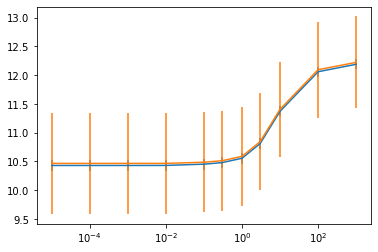

In [83]:
plt.errorbar(alphas, training_errors, training_devs)
plt.errorbar(alphas, testing_errors, testing_devs)
plt.xscale('log')
# orange is testing error and blue is training error

### Using alpha = 1 to train the model
Looking at the data above, I chose to set alpha to 1 for the final model training. The standard deviations are large, and setting alpha to a larger value such as 3 or 5 would still put the expected error within the standard deviation of the testing error for lower alphas, but the plot begins to curve upward at alpha=1. I therefore judge that there is more performance to be gained from setting alpha to 1 than there are benefits of minimizing the feature-weights further with alpha being set to for example 3.

With alpha being set to 1, there is no longer any need for training and testing sets (since the complexity of the model is set), and we can instead train the model on all the data.

In [84]:
def train_only():
    linreg = Ridge(alpha=1)
    linreg.fit(X, Y)
    pred_train = linreg.predict(X)
    return mean_squared_error(Y, pred_train, squared=False)

In [86]:
# with alpha = 1:
final_error = train_only()
print("Final training error:", final_error)
print("(for alpha=1)")

Final training error: 10.546733194719618
(for alpha=1)
